<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports 

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import lines





In [ ]:
#read in data
dermatology = pd.read_csv("https://raw.githubusercontent.com/tstef87/IDS/main/HW7/dermatology%20(1).csv")

In [ ]:
#see if any null values 
dermatology.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
#setting null age values to avg of age 
dermatology['age'] = dermatology['age'].fillna(dermatology['age'].median())
dermatology.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

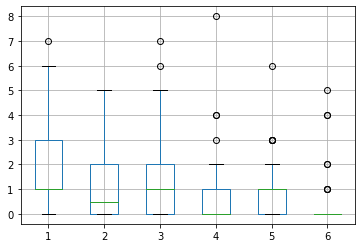

In [ ]:
#box plot
df = pd.crosstab(dermatology.age, dermatology['class'])
df.boxplot()

In [ ]:
ct = pd.crosstab(dermatology['class'], dermatology.scaling)
ct

scaling,0,1,2,3
class,,,,
1,0,13,64,35
2,0,7,43,11
3,2,28,37,5
4,0,24,25,0
5,6,34,11,1
6,0,5,15,0


In [ ]:
ordinal = ['erythema',                                    
'scaling',                                     
'definite_borders',                            
'itching',                                     
'koebner_phenomenon',                          
'polygonal_papules',                           
'follicular_papules',                          
'oral_mucosal_involvement',                    
'knee_and_elbow_involvement',                  
'scalp_involvement',                          
'melanin_incontinence',                        
'eosinophils_in_the_infiltrate',               
'pnl_infiltrate',                              
'fibrosis_of_the_papillary_dermis',            
'exocytosis',                                  
'acanthosis',                                  
'hyperkeratosis',                              
'parakeratosis',                               
'clubbing_of_the_rete_ridges',                 
'elongation_of_the_rete_ridges',               
'thinning_of_the_suprapapillary_epidermis',    
'spongiform_pustule',                          
'munro_microabcess',                           
'focal_hypergranulosis',                       
'disappearance_of_the_granular_layer',         
'vacuolisation_and_damage_of_basal_layer',     
'spongiosis',                                  
'saw-tooth_appearance_of_retes',            
'follicular_horn_plug',                        
'perifollicular_parakeratosis',                
'inflammatory_monoluclear_inflitrate',         
'band-like_infiltrate']

In [ ]:
#determining highes corelation betwean atribute and class
best = 0  
bestStr = 0
count = 0 


for i in ordinal:
  ct = pd.crosstab(dermatology['class'], dermatology[i])
  if (i == 'family_history'):
    sum1 = ct[0].sum()
    sum2 = ct[1].sum()
    sum3 = sum2 - sum1
  
  elif (i == 'eosinophils_in_the_infiltrate'):
    sum1= ct[0].sum()
    sum2 = ct[1].sum() + ct[2].sum()
    sum3 = sum2- sum1

  else:
    sum1= ct[0].sum()
    sum2 = ct[1].sum() + ct[2].sum() + (ct[3].sum()*2)
    sum3 = sum2- sum1
  
  if (sum3 > best):
    best = sum3
    bestName = i
    bestStr = count 
  count += 1 

ct = pd.crosstab(dermatology[ordinal[bestStr]], dermatology['class'])
ct

  

class,1,2,3,4,5,6
erythema,,,,,,
0,1,0,1,0,2,0
1,7,5,7,11,25,2
2,63,34,49,32,22,15
3,41,22,15,6,3,3


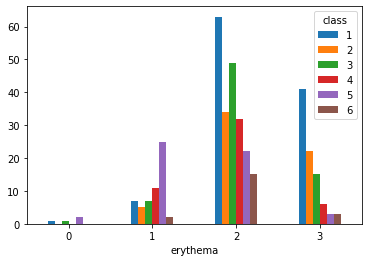

In [ ]:
#ploting data
barplot = ct.plot.bar(rot=0)

In [ ]:
#conditions for new col
def newCol(df):
  if (df['class'] == 1):
    return 1
  else:
    return 0

In [ ]:
#making new col
dermatology['disease_1'] = dermatology.apply(lambda row: newCol(row), axis=1)

In [ ]:
#checking to see if it worked 
dermatology.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0
5,2,3,2,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,41.0,2,0
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,18.0,5,0
7,2,2,3,3,3,3,0,2,0,0,...,2,3,2,0,0,3,3,57.0,3,0
8,2,2,1,0,2,0,0,0,0,0,...,0,2,0,0,0,2,0,22.0,4,0
9,2,2,1,0,1,0,0,0,0,0,...,0,2,0,0,0,2,0,30.0,4,0


#***linear regression model***

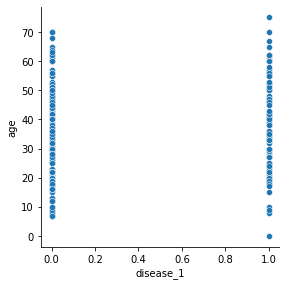

In [ ]:
#making the model
sns.pairplot(dermatology, x_vars='disease_1', y_vars='age', height=4, aspect=1, kind= 'scatter' )
plt.show()

In [ ]:
lm1 = linear_model.LinearRegression()

x = dermatology['disease_1'].values.reshape(-1, 1)
y = dermatology['age'].values.reshape(-1, 1)

lm1.fit(x, y)

print ("Intercept: ", lm1.intercept_)
print ("Slope: ", lm1.coef_)


Intercept:  [34.91338583]
Slope:  [[4.42589989]]


In [ ]:
y_pred = lm1.predict(x)

#mse and R2 
print ("R2 score: ", r2_score(y, y_pred))
print ("MSE: ", mean_squared_error(y, y_pred))


R2 score:  0.01815773383567898
MSE:  224.9431738553172


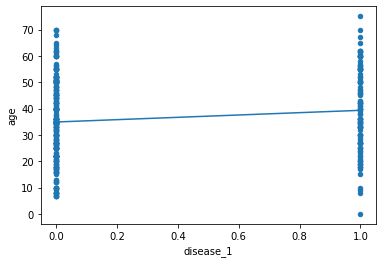

In [ ]:
#plot with regression line 
dermatology.plot(kind='scatter', x='disease_1', y='age')
plt.plot(x, lm1.intercept_ +lm1.coef_*x)

# ***NB classifier model***


In [ ]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = dermatology.iloc[:,0:4]
y = dermatology.iloc[:,35]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)

     erythema  scaling  definite_borders  itching
346         2        2                 2        1
306         2        1                 1        0
225         2        1                 2        2
116         2        2                 1        2
218         3        2                 1        0
..        ...      ...               ...      ...
215         2        3                 2        3
61          2        1                 1        0
360         2        2                 1        1
147         1        1                 0        3
195         2        2                 1        2

[237 rows x 4 columns]
     erythema  scaling  definite_borders  itching
149         2        3                 0        2
295         2        1                 0        2
80          3        2                 2        2
246         2        2                 2        0
184         2        2                 1        0
..        ...      ...               ...      ...
122         1        1    

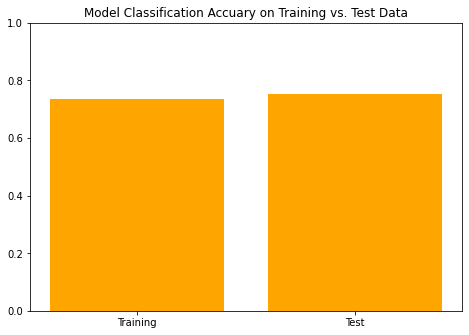

Test:  0.751937984496124
Training:  0.7341772151898734


In [ ]:
# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()
print("Test: ", NBmodel.score(X_test, y_test))
print("Training: ", NBmodel.score(X_train, y_train))

#***Decision tree model***

In [ ]:
# Prepare X and y
X = dermatology.filter(['erythema',                                    
'scaling',                                     
'definite_borders',                            
'itching',                                     
'koebner_phenomenon',                          
'polygonal_papules',                           
'follicular_papules',                          
'oral_mucosal_involvement',                    
'knee_and_elbow_involvement',                  
'scalp_involvement',                          
'melanin_incontinence',                        
'eosinophils_in_the_infiltrate',               
'pnl_infiltrate',                              
'fibrosis_of_the_papillary_dermis',            
'exocytosis',                                  
'acanthosis',                                  
'hyperkeratosis',                              
'parakeratosis',                               
'clubbing_of_the_rete_ridges',                 
'elongation_of_the_rete_ridges',               
'thinning_of_the_suprapapillary_epidermis',    
'spongiform_pustule',                          
'munro_microabcess',                           
'focal_hypergranulosis',                       
'disappearance_of_the_granular_layer',         
'vacuolisation_and_damage_of_basal_layer',     
'spongiosis',                                  
'saw-tooth_appearance_of_retes',            
'follicular_horn_plug',                        
'perifollicular_parakeratosis',                
'inflammatory_monoluclear_inflitrate',         
'band-like_infiltrate'])
y = dermatology['class']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

#print sizes
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (292, 32)
Test size: (74, 32)


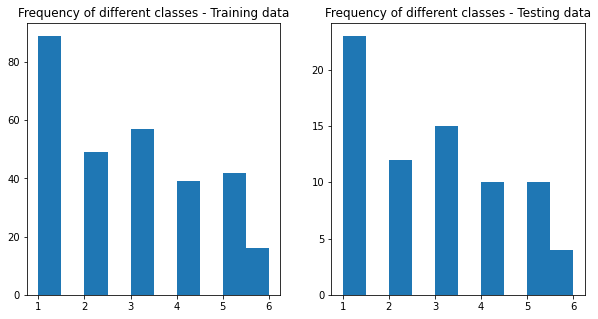

In [ ]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

|--- clubbing_of_the_rete_ridges <= 0.50
|   |--- vacuolisation_and_damage_of_basal_layer <= 0.50
|   |   |--- fibrosis_of_the_papillary_dermis <= 0.50
|   |   |   |--- koebner_phenomenon <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- koebner_phenomenon >  0.50
|   |   |   |   |--- class: 4
|   |   |--- fibrosis_of_the_papillary_dermis >  0.50
|   |   |   |--- class: 5
|   |--- vacuolisation_and_damage_of_basal_layer >  0.50
|   |   |--- class: 3
|--- clubbing_of_the_rete_ridges >  0.50
|   |--- class: 1



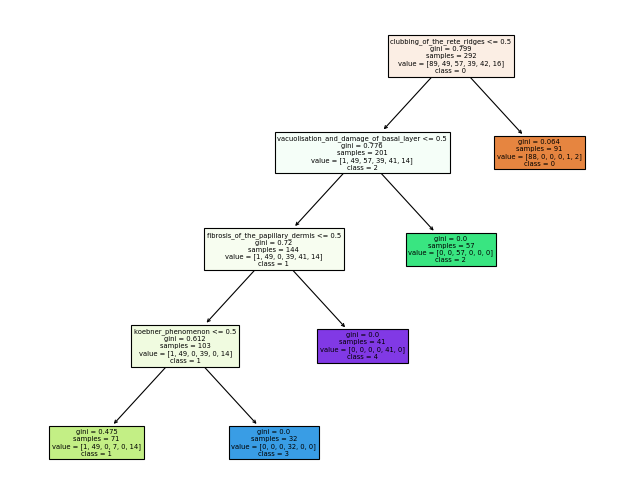

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# The CART tree; try different values for max_depth and max_leaf_nodes
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)


# Plot the tree
cn = ['0', '1','2','3','4','5','6']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

In [ ]:

# Record CART's and C5's predictions
cart_predictions = cart_classifier.predict(X_test)

# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)

# Print CART's confusion matrix
print(cart_cm)


[[21  2  0  0  0  0]
 [ 0 11  0  1  0  0]
 [ 0  0 14  0  1  0]
 [ 0  2  0  8  0  0]
 [ 2  0  0  0  8  0]
 [ 0  4  0  0  0  0]]


Text(0.5, 89.87999999999997, 'Predicted label')

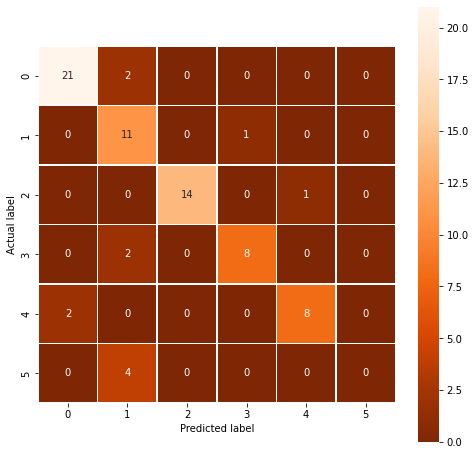

In [ ]:
# Visualize CART's confusion matrix as a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cart_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')